In [65]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('results.csv', sep=';')

# Per image positive rate (for vae images, this is the perception rate)

In [45]:
by_image = pd.DataFrame(df.groupby('image').count()['id']).join(pd.DataFrame(df.groupby('image').sum()['response']), 'image')
by_image = by_image.rename(columns={'id' : 'count', 'response' : 'votes'})
by_image_scores = pd.DataFrame(by_image['votes'] / by_image['count'])
by_image_scores.columns = ['score']

In [74]:
by_image_scores

,score
image,
no_vae_0.png,0.629630
no_vae_1.png,0.444444
no_vae_2.png,0.321429
no_vae_3.png,0.592593
no_vae_4.png,0.500000
style_0.jpg,0.296296
style_1.jpg,0.857143
style_2.jpg,0.333333
style_3.jpg,0.392857


# Print survey images

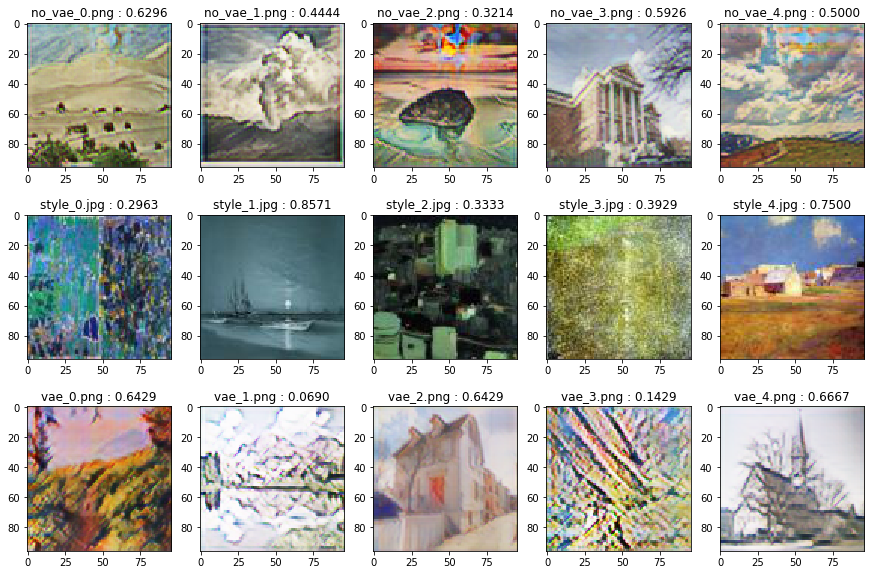

In [73]:
plt.figure(figsize=(15, 10))
for idx in range(15):
    image = by_image_scores.index[idx]
    score = by_image_scores.loc[image, 'score']
    img = Image.open(os.path.join('images', image)).convert('RGB')
    plt.subplot(3, 5, idx + 1)
    plt.title(f'{image} : {score:.4f}')
    plt.imshow(img)

# By image category (real or fake)

In [4]:
def image_to_category(image):
    """ Maps an image to its category. """
    if 'no_vae' in image:
        return 'no_vae'
    if 'vae' in image:
        return 'vae'
    return 'real'

In [5]:
by_category = by_image.groupby(image_to_category).sum()
by_category['votes'] / by_category['count']

no_vae    0.496350
real      0.528986
vae       0.428571
dtype: float64

In [6]:
by_category

,count,votes
no_vae,137,68
real,138,73
vae,140,60


# By session

In [12]:
sess_id = 'e575dd8b6b99759e6b1fbdc83544328d'

In [13]:
df_sess = df[df['session'] == sess_id]
sess_by_image = pd.DataFrame(df_sess.groupby('image').count()['id']).join(pd.DataFrame(df_sess.groupby('image').sum()['response']), 'image')
sess_by_category = sess_by_image.groupby(image_to_category).sum()
sess_by_category = sess_by_category.rename(columns={'id' : 'count', 'response' : 'votes'})
sess_by_category

,count,votes
no_vae,5,2
real,5,4
vae,5,0


# Average session performance

In [26]:
def session_performance(sess_id):
    df_sess = df[df['session'] == sess_id]
    sess_by_image = pd.DataFrame(df_sess.groupby('image').count()['id']).join(pd.DataFrame(df_sess.groupby('image').sum()['response']), 'image')
    sess_by_category = sess_by_image.groupby(image_to_category).sum()
    sess_by_category = sess_by_category.rename(columns={'id' : 'count', 'response' : 'votes'})
    correct = 0
    try:
        correct = sess_by_category.loc['real', 'votes']
    except KeyError: pass
    try:
        correct += sess_by_category.loc['vae', 'count'] - sess_by_category.loc['vae', 'votes']
    except KeyError: pass
    try:
        correct += sess_by_category.loc['no_vae', 'count'] - sess_by_category.loc['no_vae', 'votes']
    except KeyError: pass
    return correct

In [27]:
performances = {
    session : session_performance(session) for session in df.session.unique()
}

In [28]:
len(performances)

29

In [29]:
np.array(list(map(lambda x: float(x), performances.values()))).mean()

7.655172413793103

In [30]:
np.array(list(map(lambda x: float(x), performances.values()))).std()

2.1379310344827585